<a href="https://colab.research.google.com/github/Sashka123123/CHM/blob/main/%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

f'(x) = cos(x) + 1
f''(x) = -sin(x)
f'''(x) = -cos(x)
f(0) = 0
T(x) = -0.166666666666667*x**3 + 2.0*x


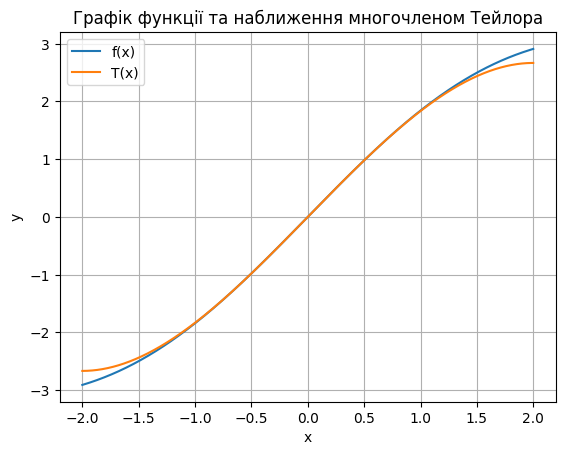

taylor_np =          3             2
-0.1545 x - 1.665e-16 x + 1.996 x - 2.107e-17


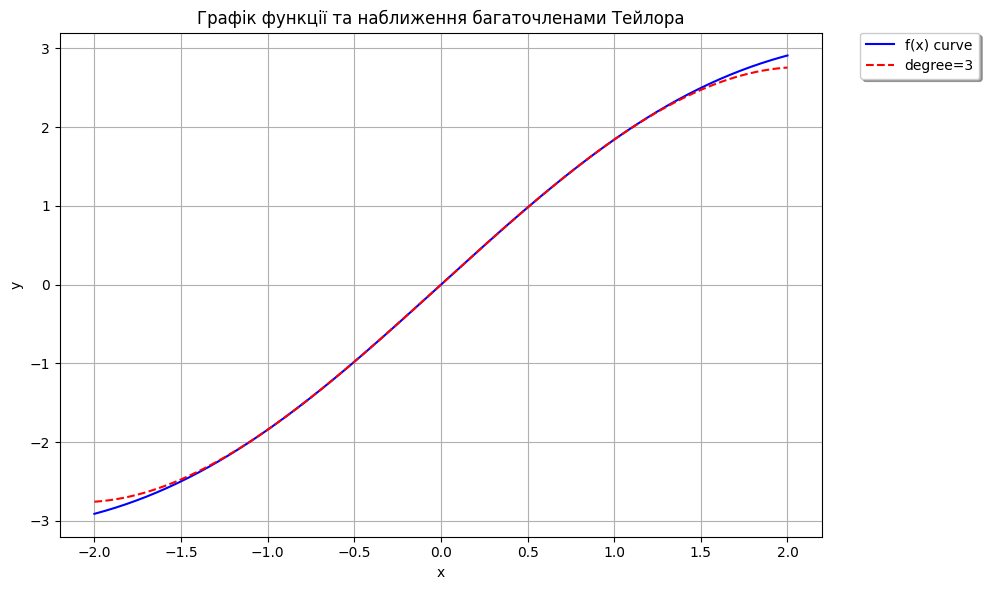

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

x = sp.symbols('x')
f = x + sp.sin(x)

f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
f3 = sp.diff(f2, x)

print("f'(x) =", f1)
print("f''(x) =", f2)
print("f'''(x) =", f3)

x0 = 0
f_x0 = f.subs(x, x0).evalf()
f1_x0 = f1.subs(x, x0).evalf()
f2_x0 = f2.subs(x, x0).evalf()
f3_x0 = f3.subs(x, x0).evalf()

T = f_x0 + f1_x0 * (x - x0) + (f2_x0 / 2) * (x - x0)**2 + (f3_x0 / 6) * (x - x0)**3

print("f(0) =", f_x0)
print("T(x) =", T.evalf())

x_vals = np.linspace(-2, 2, 1000)
f_vals = np.array([f.subs(x, xi).evalf() for xi in x_vals])
T_vals = np.array([T.subs(x, xi).evalf() for xi in x_vals])

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals, label="f(x)")
ax.plot(x_vals, T_vals, label="T(x)")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Графік функції та наближення многочленом Тейлора")
plt.grid(True)
plt.show()


def f_np(x):
    return x + np.sin(x)

x_np = np.linspace(-2.0, 2.0, num=400)
plt.figure(figsize=(10, 6))
plt.plot(x_np, f_np(x_np), label="f(x) curve", color='blue')

degree = 3
taylor_np = approximate_taylor_polynomial(f_np, 0, degree, 1)
print('taylor_np =', taylor_np)

plt.plot(x_np, taylor_np(x_np), label=f"degree={degree}", color='red', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, shadow=True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графік функції та наближення багаточленами Тейлора")
plt.tight_layout()
plt.grid()
plt.show()
